In [30]:
from pathlib import Path
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

In [31]:
gun_violence_data = Path("MOResources/gun_violence_us (1).csv")
gun_violence_df = pd.read_csv(gun_violence_data)
gun_violence_df.head()

,state,mortality_rate,ownership_rate
0,AL,16.7,0.489
1,AK,18.8,0.617
2,AZ,13.4,0.323
3,AR,16.4,0.579
4,CA,7.4,0.201


In [32]:
gun_violence_df.columns

Index(['state', 'mortality_rate', 'ownership_rate'], dtype='object')

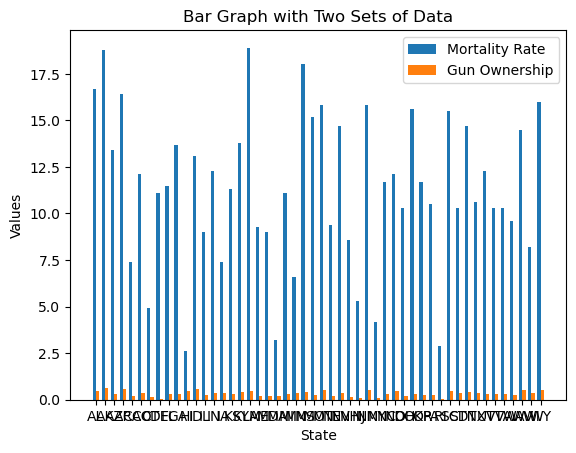

In [33]:
data = {'State': gun_violence_df['state'],
        'Mortality Rate': gun_violence_df['mortality_rate'],
        'Gun Ownership': gun_violence_df['ownership_rate']}
df = pd.DataFrame(data)

# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars on the x-axis
bar_positions1 = range(len(df))
bar_positions2 = [x + bar_width for x in bar_positions1]

# Create the bar graph
plt.bar(bar_positions1, df['Mortality Rate'], width=bar_width, label='Mortality Rate')
plt.bar(bar_positions2, df['Gun Ownership'], width=bar_width, label='Gun Ownership')

# Add labels and title
plt.xlabel('State')
plt.ylabel('Values')
plt.title('Bar Graph with Two Sets of Data')
plt.xticks([x + bar_width/2 for x in bar_positions1], df['State'])

# Add legend
plt.legend()

# Show the plot

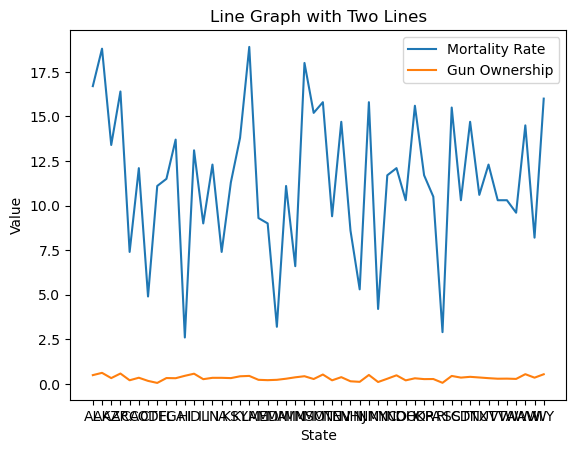

In [34]:
data = {'State': gun_violence_df['state'],
        'Mortality Rate': gun_violence_df['mortality_rate'],
        'Gun Ownership': gun_violence_df['ownership_rate']}
df = pd.DataFrame(data)

# Plot the lines
plt.plot(df['State'], df['Mortality Rate'], label='Mortality Rate')
plt.plot(df['State'], df['Gun Ownership'], label='Gun Ownership')

# Add labels and title
plt.xlabel('State')
plt.ylabel('Value')
plt.title('Line Graph with Two Lines')

# Add legend
plt.legend()

# Show the plot
plt.show()

In [35]:
mortality_rate_average = gun_violence_df['mortality_rate'].mean()
print(mortality_rate_average)

11.354000000000001


In [36]:
ownership_rate_average = gun_violence_df['ownership_rate'].mean()
print(ownership_rate_average)

0.33092000000000005


In [37]:
firearm_death_data = Path("MOResources/Firearm_suicide_homicide_dataset.csv")
firearm_death_df = pd.read_csv(firearm_death_data)
firearm_death_df.tail()

,year,state,division,total_population,fss,homicide_rate,firearm_homicide_rate,nonfirearm_homicide_rate,firearm_suicides,total_suicides,firearm_homicides,nonfirearm_homicides,total_homicides,white_fss,nonwhite_fss,nextyearfss,nextyearnonwhitefss,nextyearwhitefss
3646,2020,Virginia,South Atlantic,8590563.0,0.580350,6.181201395,5.121899461,1.059301934,697,1201,440.0,91.0,531,0.594540,0.514151,NaN,NaN,NaN
3647,2020,Washington,Pacific,7693612.0,0.509901,4.185290342,2.742534976,1.442755366,618,1212,211.0,111.0,322,0.531191,0.363636,NaN,NaN,NaN
3648,2020,West Virginia,South Atlantic,1784787.0,0.621469,6.387316806,4.874531247,1.512785559,220,354,87.0,27.0,114,0.626113,0.529412,NaN,NaN,NaN
3649,2020,Wisconsin,East North Central,5832655.0,0.510393,5.726380182,4.337647264,1.388732918,442,866,253.0,81.0,334,0.516169,0.435484,NaN,NaN,NaN
3650,2020,Wyoming,Mountain,582328.0,0.703297,4.29311316,3.091041475,1.202071685,128,182,18.0,7.0,25,0.706215,0.600000,NaN,NaN,NaN


In [38]:
#years_firearm_death_df = firearm_death_df.sort_values("year", ascending=False)
#years_firearm_death_df.head()


In [39]:
firearm_death_df.columns

Index(['year', 'state', 'division', 'total_population', 'fss', 'homicide_rate',
       'firearm_homicide_rate', 'nonfirearm_homicide_rate', 'firearm_suicides',
       'total_suicides', 'firearm_homicides', 'nonfirearm_homicides',
       'total_homicides', 'white_fss', 'nonwhite_fss', 'nextyearfss',
       'nextyearnonwhitefss', 'nextyearwhitefss'],
      dtype='object')

In [40]:
firearm_death_df = firearm_death_df[['year', 'state', 'division', 'total_population', 'fss', 'homicide_rate',
       'firearm_homicide_rate', 'nonfirearm_homicide_rate', 'firearm_suicides',
       'total_suicides', 'firearm_homicides', 'nonfirearm_homicides',
       'total_homicides', 'white_fss', 'nonwhite_fss']]
firearm_death_df

,year,state,division,total_population,fss,homicide_rate,firearm_homicide_rate,nonfirearm_homicide_rate,firearm_suicides,total_suicides,firearm_homicides,nonfirearm_homicides,total_homicides,white_fss,nonwhite_fss
0,1949,Alabama,East South Central,3004000.0,0.717949,14.28095872,7.822902796,6.458055925,140,195,235.0,194.0,429,0.708571,0.482655
1,1949,Arizona,Mountain,726000.0,0.575000,5.64738292,3.168044077,2.479338843,46,80,23.0,18.0,41,0.583333,0.800000
2,1949,Arkansas,West South Central,1835000.0,0.671053,7.901907357,4.141689373,3.760217984,102,152,76.0,69.0,145,0.664336,0.500000
3,1949,California,Pacific,10499000.0,0.382623,4.61948757,1.857319745,2.762167826,709,1853,195.0,290.0,485,0.382187,0.777778
4,1949,Colorado,Mountain,1249000.0,0.551570,5.044035228,3.442754203,1.601281025,123,223,43.0,20.0,63,0.559633,0.392405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3646,2020,Virginia,South Atlantic,8590563.0,0.580350,6.181201395,5.121899461,1.059301934,697,1201,440.0,91.0,531,0.594540,0.514151
3647,2020,Washington,Pacific,7693612.0,0.509901,4.185290342,2.742534976,1.442755366,618,1212,211.0,111.0,322,0.531191,0.363636
3648,2020,West Virginia,South Atlantic,1784787.0,0.621469,6.387316806,4.874531247,1.512785559,220,354,87.0,27.0,114,0.626113,0.529412
3649,2020,Wisconsin,East North Central,5832655.0,0.510393,5.726380182,4.337647264,1.388732918,442,866,253.0,81.0,334,0.516169,0.435484


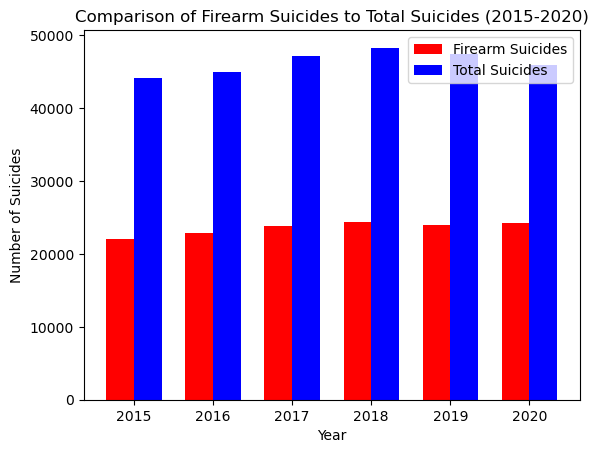

In [41]:
# Load your dataset into a pandas DataFrame
#firearm_death_df = pd.read_csv(firearm_death_data)

# Filter the dataset for years 2015 to 2020
filtered_data = firearm_death_df[(firearm_death_df['year'] >= 2015) & (firearm_death_df['year'] <= 2020)]

# Group the filtered data by year and calculate the sum of firearm suicides and total suicides
grouped_data = filtered_data.groupby('year').agg({'firearm_suicides': 'sum', 'total_suicides': 'sum'}).reset_index()

# Create a side-by-side bar graph
labels = grouped_data['year']
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
bar1 = ax.bar(x - width/2, grouped_data['firearm_suicides'], width, label='Firearm Suicides', color='red')
bar2 = ax.bar(x + width/2, grouped_data['total_suicides'], width, label='Total Suicides', color='blue')

ax.set_xlabel('Year')
ax.set_ylabel('Number of Suicides')
ax.set_title('Comparison of Firearm Suicides to Total Suicides (2015-2020)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

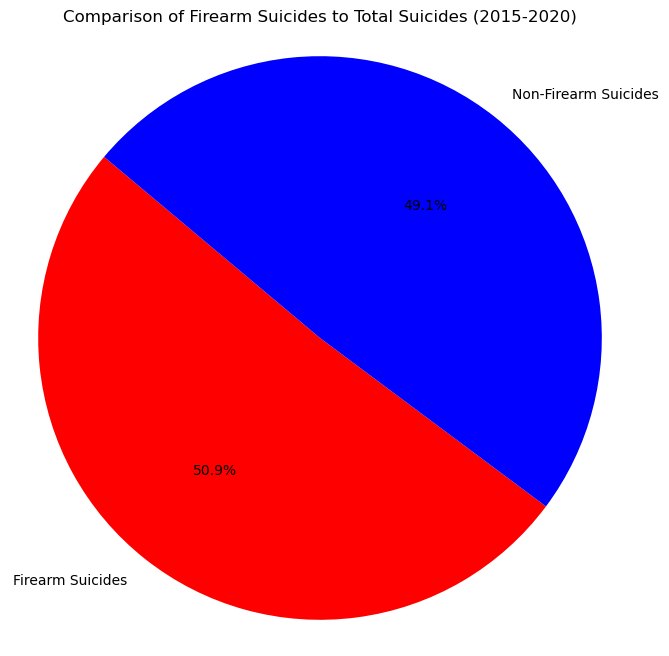

In [42]:
#firearm_death_df = pd.read_csv(firearm_death_data)

# Filter the dataset for years 2015 to 2020
#filtered_data = firearm_death_df[(firearm_death_df['year'] >= 2015) & (firearm_death_df['year'] <= 2020)]

# Calculate the total firearm suicides and total suicides for the filtered years
total_firearm_suicides = filtered_data['firearm_suicides'].sum()
total_suicides = filtered_data['total_suicides'].sum()

# Create a pie chart
labels = ['Firearm Suicides', 'Non-Firearm Suicides']
sizes = [total_firearm_suicides, total_suicides - total_firearm_suicides]
colors = ['red', 'blue']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Comparison of Firearm Suicides to Total Suicides (2015-2020)')
plt.show()

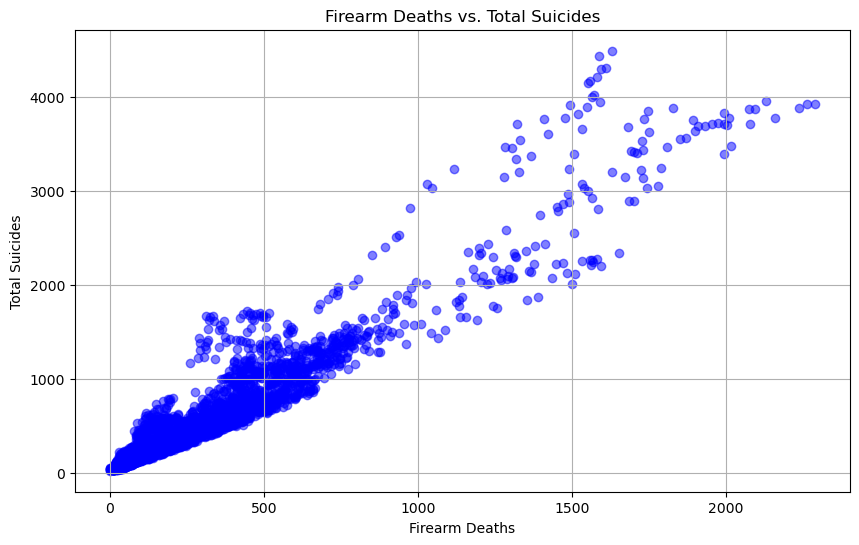

In [43]:
firearm_deaths = firearm_death_df['firearm_suicides']
total_suicides = firearm_death_df['total_suicides']

plt.figure(figsize=(10, 6))
plt.scatter(firearm_deaths, total_suicides, color='blue', alpha=0.5)
plt.title('Firearm Deaths vs. Total Suicides')
plt.xlabel('Firearm Deaths')
plt.ylabel('Total Suicides')
plt.grid(True)
plt.show()

In [46]:
correlation_coefficient, p_value = pearsonr(firearm_deaths, total_suicides)
print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

Pearson Correlation Coefficient: 0.952390378750439
P-value: 0.0


<Axes: title={'center': 'firearm_suicides'}, xlabel='year'>

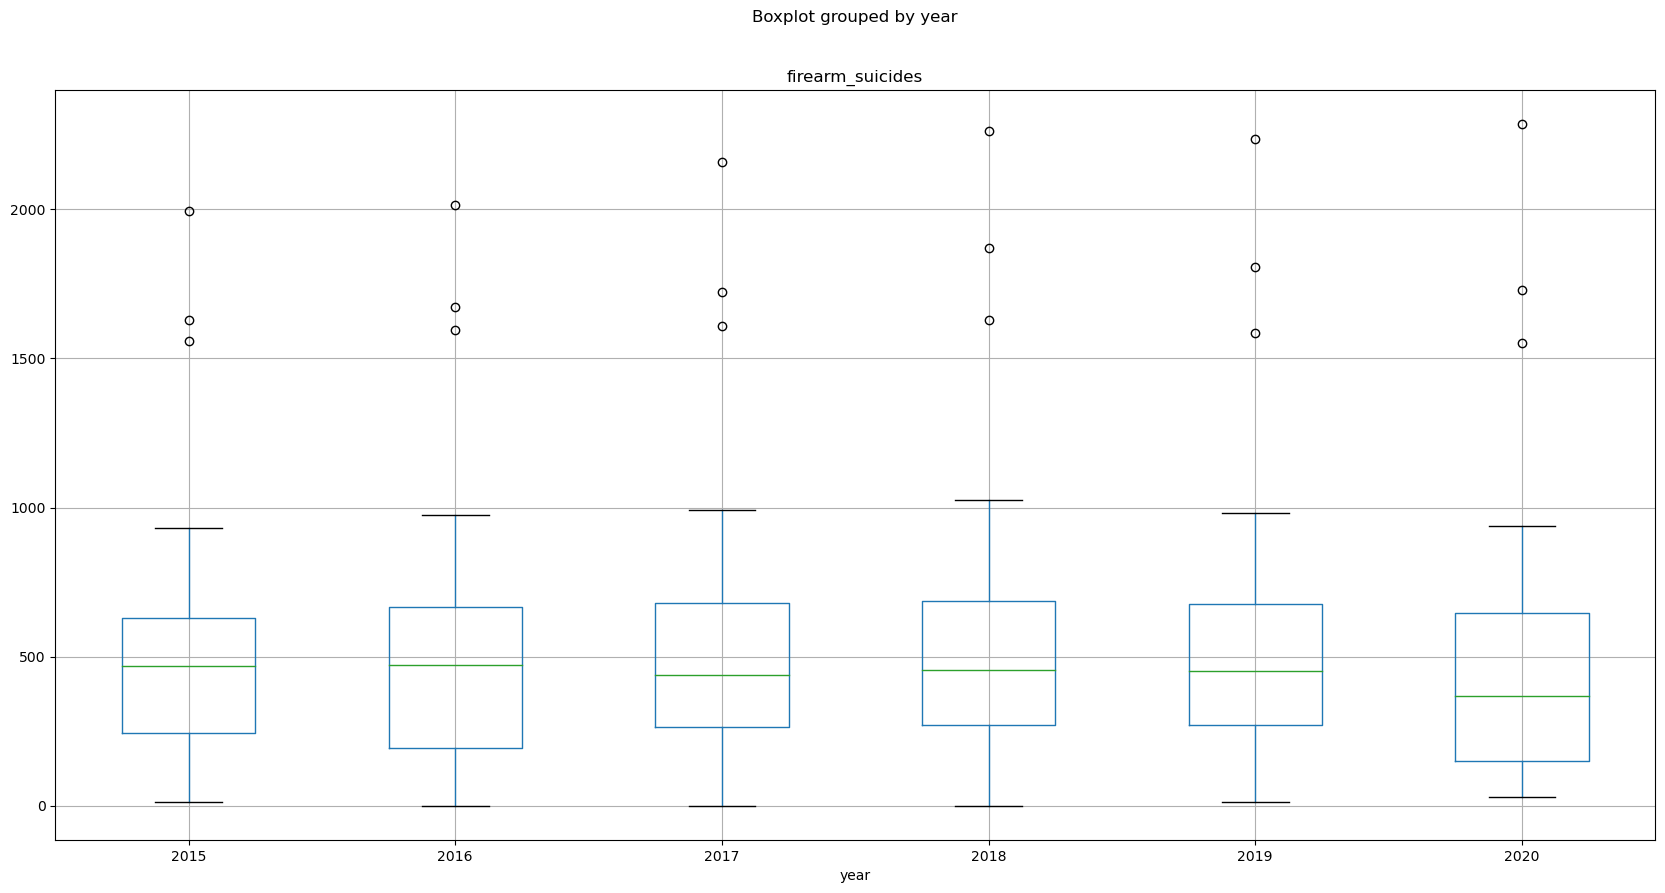

In [14]:
# Create a boxplot to compare means
#filtered_data.replace(0, pd.NA, inplace=True)
filtered_data2 = filtered_data.dropna() 
filtered_data2.boxplot("firearm_suicides", by="year", figsize=(20, 10))

In [15]:
 # Extract individual groups
group0 = filtered_data2[filtered_data2["year"] == 2015]["firearm_suicides"]
group1 = filtered_data2[filtered_data2["year"] == 2016]["firearm_suicides"]
group2 = filtered_data2[filtered_data2["year"] == 2017]["firearm_suicides"]
group3 = filtered_data2[filtered_data2["year"] == 2018]["firearm_suicides"]
group4 = filtered_data2[filtered_data2["year"] == 2019]["firearm_suicides"]
group5 = filtered_data2[filtered_data2["year"] == 2020]["firearm_suicides"]

In [16]:
 # Perform the ANOVA
stats.f_oneway(group0, group1, group2, group3, group4, group5)

F_onewayResult(statistic=0.1549235600888832, pvalue=0.978414786675637)

In [17]:
states= Path("MOResources/states.csv")
states_df = pd.read_csv(states)
states_df

,State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA
5,Colorado,CO
6,Connecticut,CT
7,Delaware,DE
8,District of Columbia,DC
9,Florida,FL


In [18]:
states_df = states_df.rename(columns={"State": "state"})

In [19]:
mergedstates_df =firearm_death_df.merge(states_df, on ='state')
mergedstates_df

,year,state,division,total_population,fss,homicide_rate,firearm_homicide_rate,nonfirearm_homicide_rate,firearm_suicides,total_suicides,firearm_homicides,nonfirearm_homicides,total_homicides,white_fss,nonwhite_fss,Abbreviation
0,1949,Alabama,East South Central,3004000.0,0.717949,14.28095872,7.822902796,6.458055925,140,195,235.0,194.0,429,0.708571,0.482655,AL
1,1950,Alabama,East South Central,3061743.0,0.688995,14.10961011,8.165283631,5.944326483,144,209,250.0,182.0,432,0.672131,0.807692,AL
2,1951,Alabama,East South Central,3082242.7,0.710383,11.48514359,6.359006058,5.126137536,130,183,196.0,158.0,354,0.737805,0.473684,AL
3,1952,Alabama,East South Central,3102742.4,0.728643,13.05296888,7.058272063,5.99469682,145,199,219.0,186.0,405,0.732558,0.703704,AL
4,1953,Alabama,East South Central,3123242.1,0.694690,12.03877215,6.403602206,5.635169941,157,226,200.0,176.0,376,0.686567,0.703704,AL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3646,2016,Hawaii,Pacific,1428557.0,0.212644,2.730027573,1.540015554,1.190012019,37,174,22.0,17.0,39,0.178571,0.180180,HI
3647,2017,Hawaii,Pacific,1427538.0,0.132159,2.451773613,0.280202699,2.171570914,30,227,4.0,31.0,35,0.135135,0.090090,HI
3648,2018,Hawaii,Pacific,1420491.0,0.170455,2.815927732,1.407963866,1.407963866,30,176,20.0,20.0,40,0.225352,0.099010,HI
3649,2019,Hawaii,Pacific,1415872.0,0.183036,2.471974868,0.988789947,1.483184921,41,224,14.0,21.0,35,0.182796,0.157480,HI


In [20]:
average_firearmdeath = mergedstates_df.groupby("Abbreviation")['firearm_suicides'].mean()
avg_firearmdeath_df = pd.DataFrame(average_firearmdeath)
avg_firearmdeath_df = avg_firearmdeath_df.reset_index()
avg_firearmdeath_df

,Abbreviation,firearm_suicides
0,AK,66.016129
1,AL,339.458333
2,AR,206.652778
3,AZ,370.972222
4,CA,1468.041667
5,CO,305.180556
6,CT,98.666667
7,DC,17.458333
8,DE,35.763889
9,FL,952.430556


In [21]:
stateabrv_df = gun_violence_df.rename(columns={"state": "Abbreviation"})

In [22]:
gun_violence_df

,state,mortality_rate,ownership_rate
0,AL,16.7,0.489
1,AK,18.8,0.617
2,AZ,13.4,0.323
3,AR,16.4,0.579
4,CA,7.4,0.201
5,CO,12.1,0.343
6,CT,4.9,0.166
7,DE,11.1,0.052
8,FL,11.5,0.325
9,GA,13.7,0.316


In [23]:
merged_df = stateabrv_df.merge(avg_firearmdeath_df, on='Abbreviation')

In [24]:
merged_df

,Abbreviation,mortality_rate,ownership_rate,firearm_suicides
0,AL,16.7,0.489,339.458333
1,AK,18.8,0.617,66.016129
2,AZ,13.4,0.323,370.972222
3,AR,16.4,0.579,206.652778
4,CA,7.4,0.201,1468.041667
5,CO,12.1,0.343,305.180556
6,CT,4.9,0.166,98.666667
7,DE,11.1,0.052,35.763889
8,FL,11.5,0.325,952.430556
9,GA,13.7,0.316,535.222222


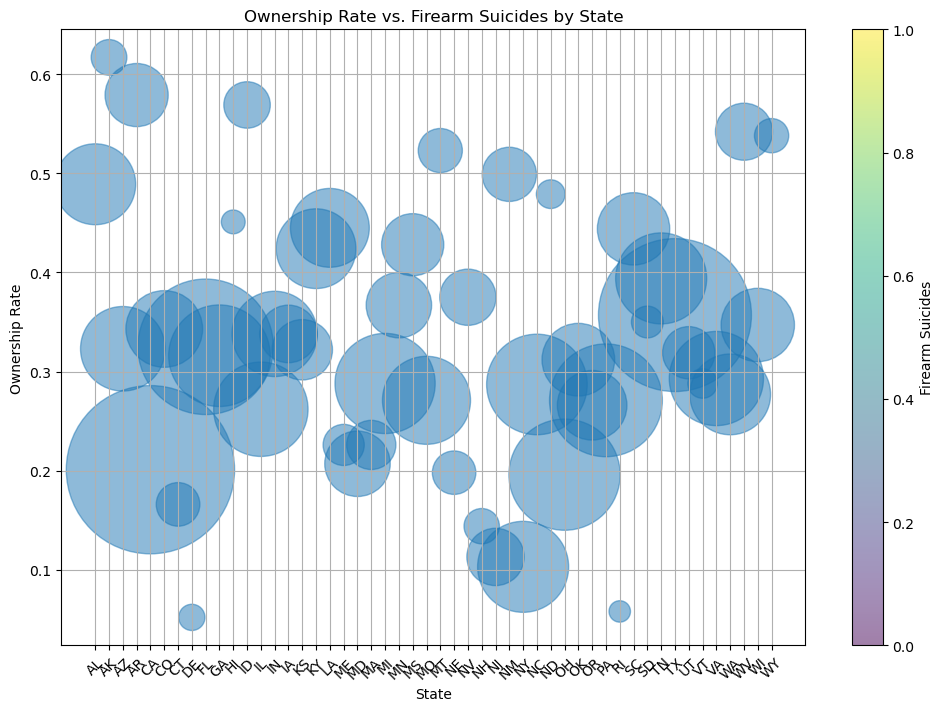

In [25]:
plt.figure(figsize=(12, 8))
plt.scatter(merged_df['Abbreviation'], merged_df['ownership_rate'], s=merged_df['firearm_suicides']*10, alpha=0.5)
plt.title('Ownership Rate vs. Firearm Suicides by State')
plt.xlabel('State')
plt.ylabel('Ownership Rate')
plt.colorbar(label='Firearm Suicides')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



In [26]:
#plt.figure(figsize=(12, 8))

# Define the width of each bar
#bar_width = 0.35

# Get the states, ownership rate, and firearm suicides data
#states = merged_df['abbreviation']
#ownership_rate = merged_df['ownership_rate']
#firearm_suicides = merged_df['firearm_suicides']

# Plot the grouped bar chart
#plt.bar(states, ownership_rate, width=bar_width, label='Ownership Rate')
#plt.bar(states, firearm_suicides, width=bar_width, label='Firearm Suicides', alpha=0.5)

#plt.xlabel('State')
#plt.ylabel('Rate')
#plt.title('Ownership Rate vs. Firearm Suicides by State')
#plt.xticks(rotation=45)
#plt.legend()
#plt.grid(axis='y')
#plt.tight_layout()
#plt.show()